**End-to-End Car Price Prediction with Regression**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Car Price Prediction/cars.csv")
df.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


**Exapolatory Data Analysis**

Checking for Missing and duplicated values

In [3]:
df.info()
df.isnull().sum()
df[df['price'] == 0]
df.shape
df.rename(columns={'make' : 'Car_name'} ,inplace=True)
#Changing the column name to make it more meaningful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               203 non-null    object 
 1   fuel_type          203 non-null    object 
 2   num_of_doors       201 non-null    object 
 3   body_style         203 non-null    object 
 4   drive_wheels       203 non-null    object 
 5   engine_location    203 non-null    object 
 6   wheel_base         203 non-null    float64
 7   length             203 non-null    float64
 8   width              203 non-null    float64
 9   height             203 non-null    float64
 10  curb_weight        203 non-null    int64  
 11  engine_type        203 non-null    object 
 12  num_of_cylinders   203 non-null    object 
 13  engine_size        203 non-null    int64  
 14  fuel_system        203 non-null    object 
 15  compression_ratio  203 non-null    float64
 16  horsepower         203 non



```
Observation : we have 4 rare 0 values at price feature and 2 Missing values at num_of_doors feature

```



In [4]:
df[df.duplicated()]



,Car_name,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
88,mitsubishi,gas,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,7.5,116,23,30,9279




```
Obesrvation : we have only one dublicated row
```






Extracting categorical features




In [5]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[categorical_features].head()
df[categorical_features].info()
df[categorical_features].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_name          203 non-null    object
 1   fuel_type         203 non-null    object
 2   num_of_doors      201 non-null    object
 3   body_style        203 non-null    object
 4   drive_wheels      203 non-null    object
 5   engine_location   203 non-null    object
 6   engine_type       203 non-null    object
 7   num_of_cylinders  203 non-null    object
 8   fuel_system       203 non-null    object
dtypes: object(9)
memory usage: 14.4+ KB


,0
Car_name,21
fuel_type,2
num_of_doors,2
body_style,5
drive_wheels,4
engine_location,2
engine_type,7
num_of_cylinders,8
fuel_system,8




```
Observation : Car_name feature has high unique values (21)
```



Analyzing categorical features

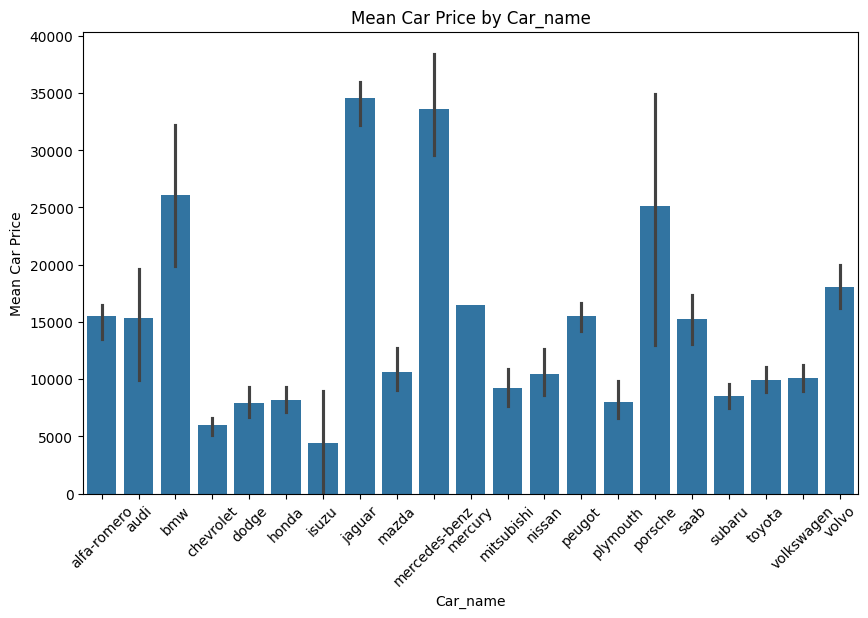

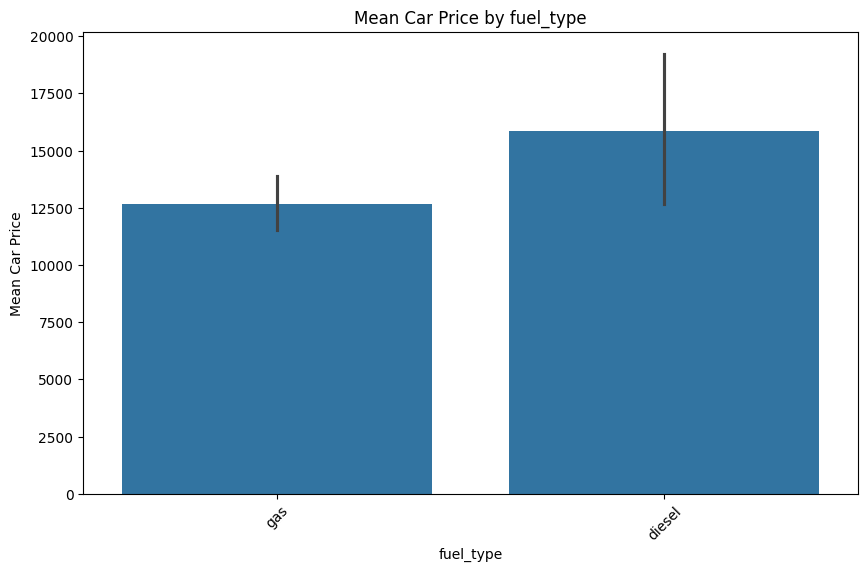

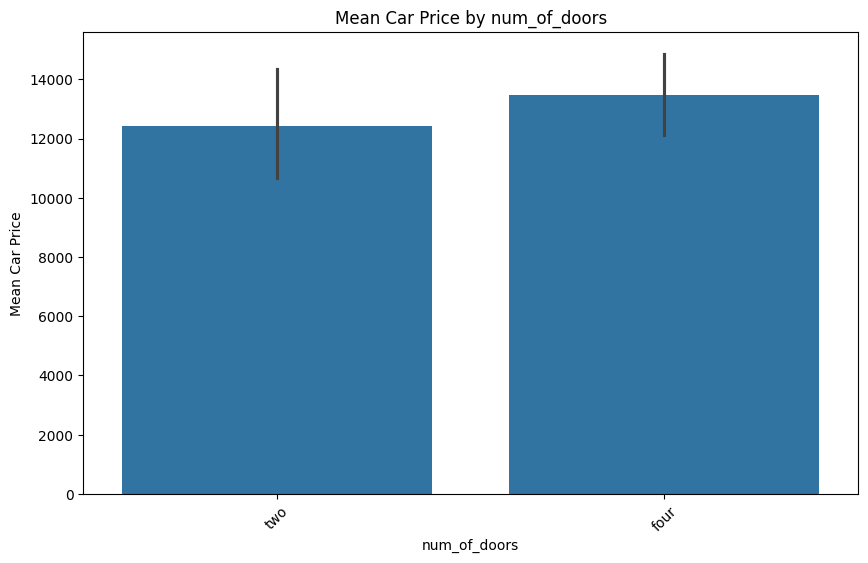

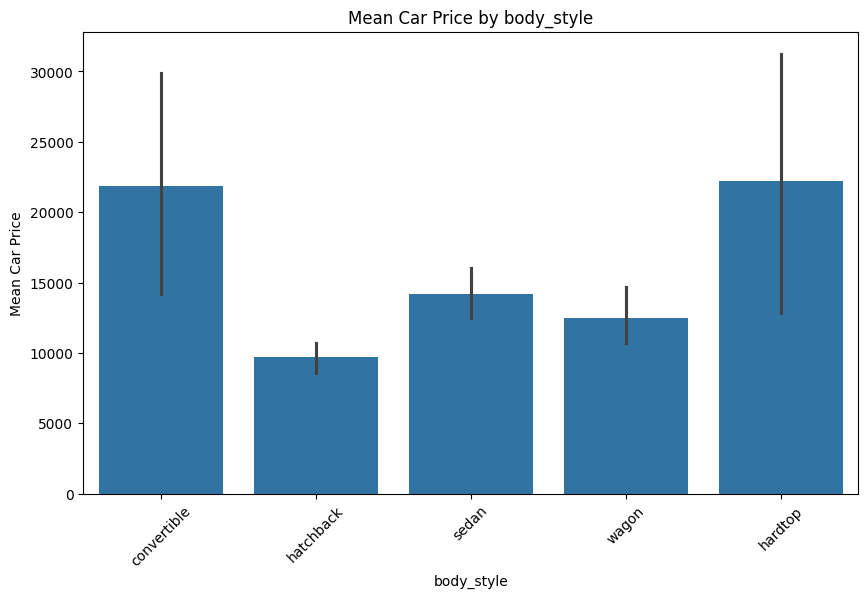

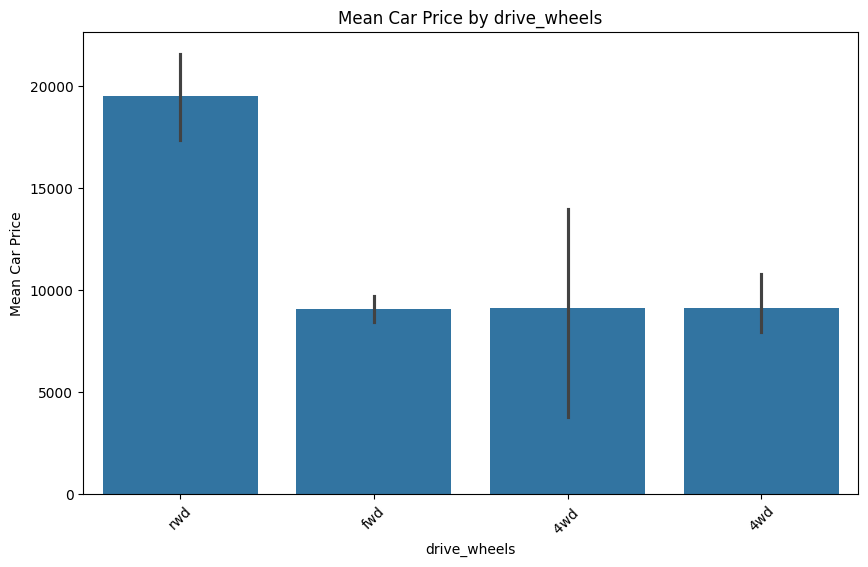

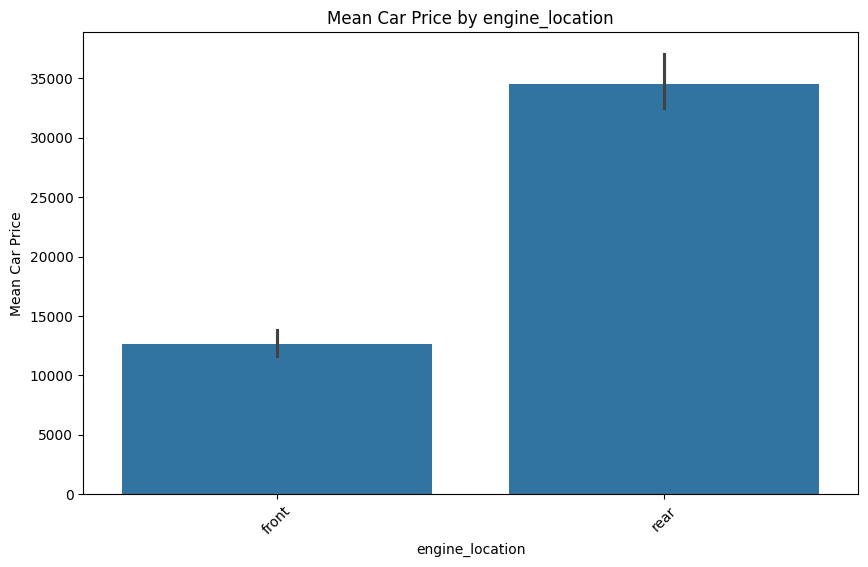

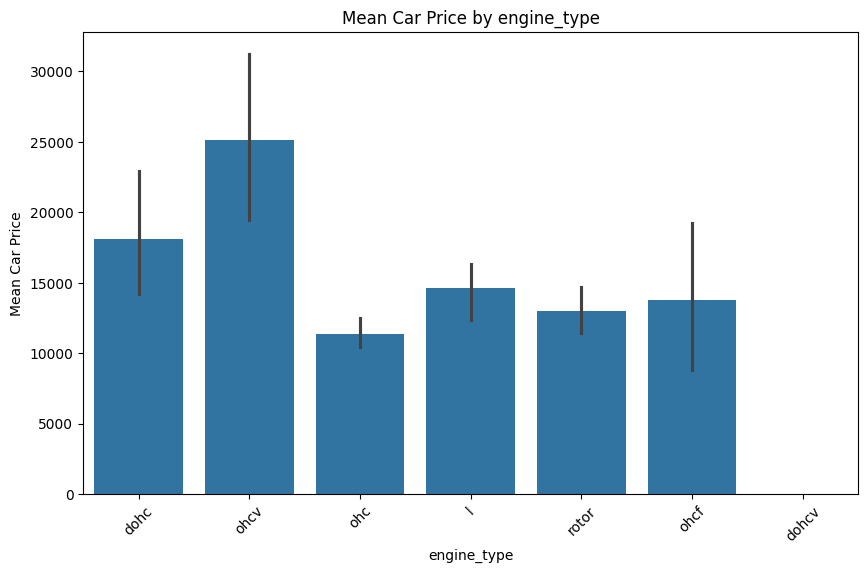

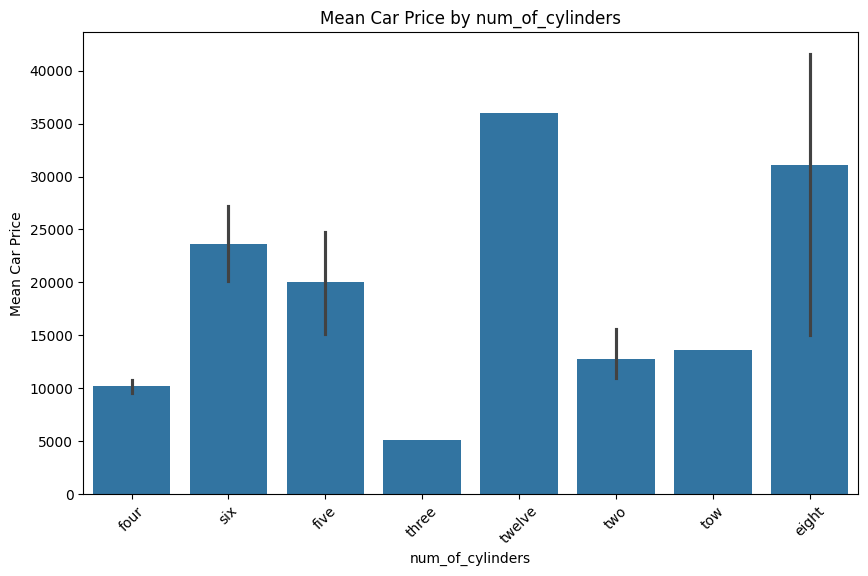

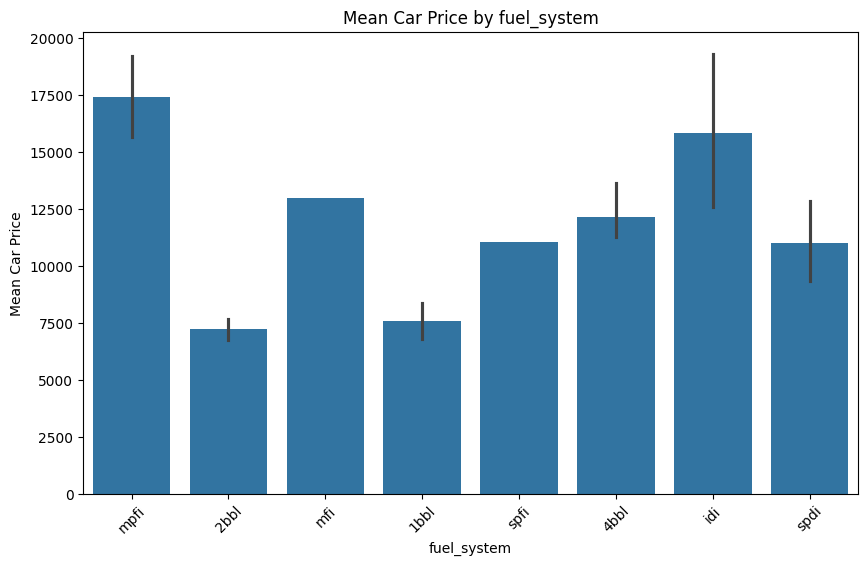

In [6]:
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x=feature, y='price', estimator='mean')
    plt.xlabel(feature)
    plt.ylabel('Mean Car Price')
    plt.title(f'Mean Car Price by {feature}')
    plt.xticks(rotation=45)
    plt.show()




Extracting numerical features

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical_features].head()
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel_base         203 non-null    float64
 1   length             203 non-null    float64
 2   width              203 non-null    float64
 3   height             203 non-null    float64
 4   curb_weight        203 non-null    int64  
 5   engine_size        203 non-null    int64  
 6   compression_ratio  203 non-null    float64
 7   horsepower         203 non-null    int64  
 8   city_mpg           203 non-null    int64  
 9   highway_mpg        203 non-null    int64  
 10  price              203 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 17.6 KB


Discrete values

In [8]:
discrete_features = [feature for feature in numerical_features if df[feature].dtype == 'int64']
df[discrete_features]
df[discrete_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   curb_weight  203 non-null    int64
 1   engine_size  203 non-null    int64
 2   horsepower   203 non-null    int64
 3   city_mpg     203 non-null    int64
 4   highway_mpg  203 non-null    int64
 5   price        203 non-null    int64
dtypes: int64(6)
memory usage: 9.6 KB


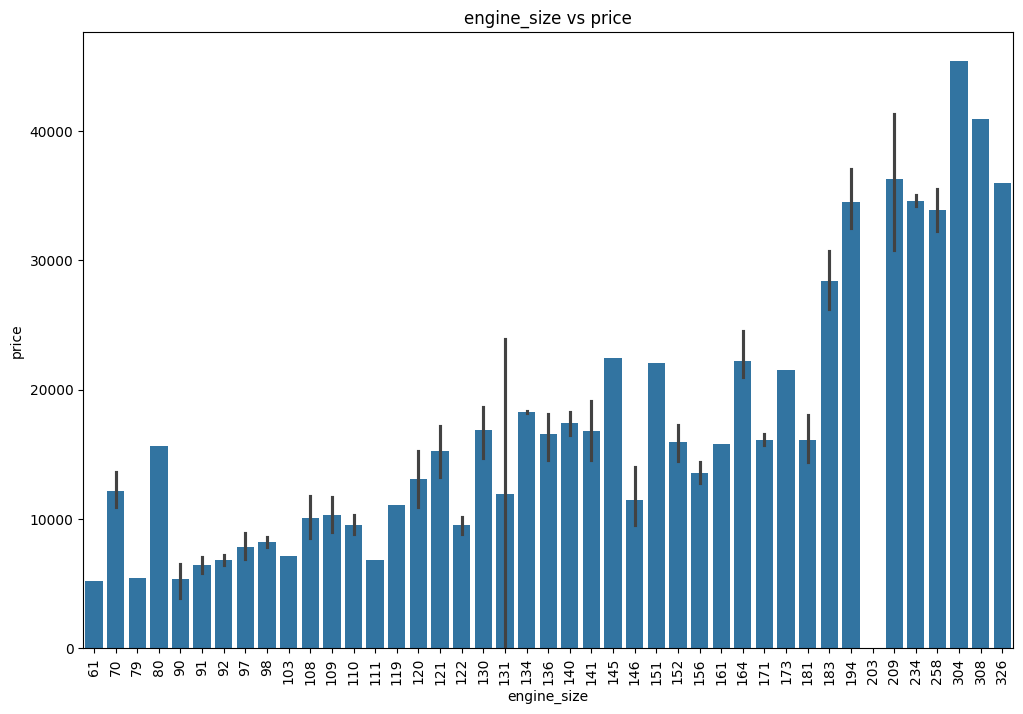

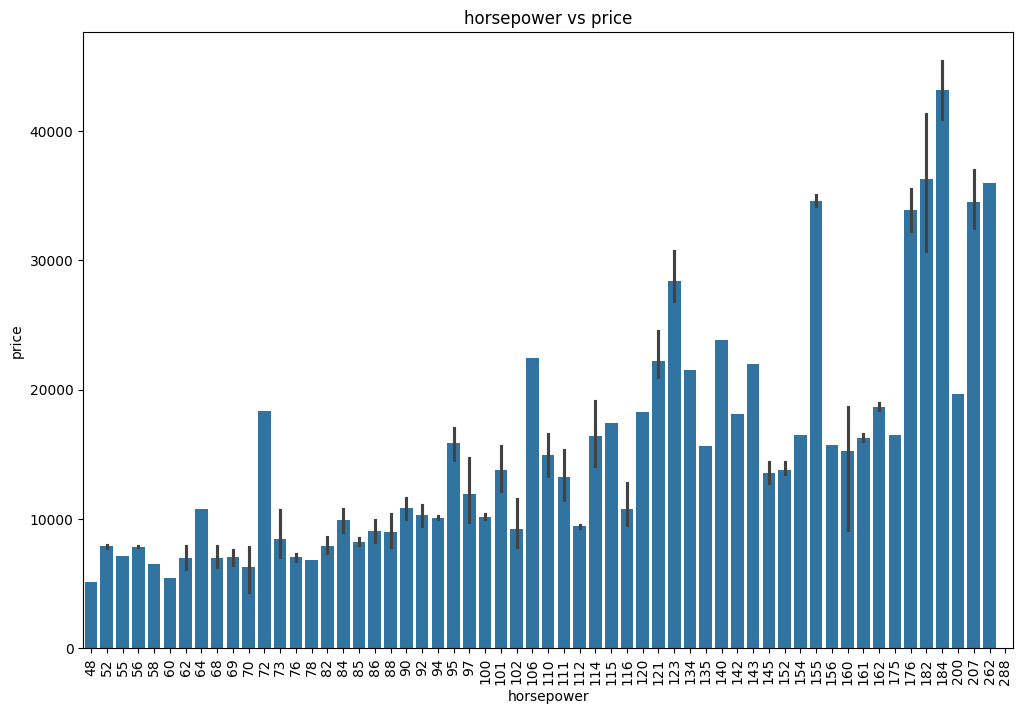

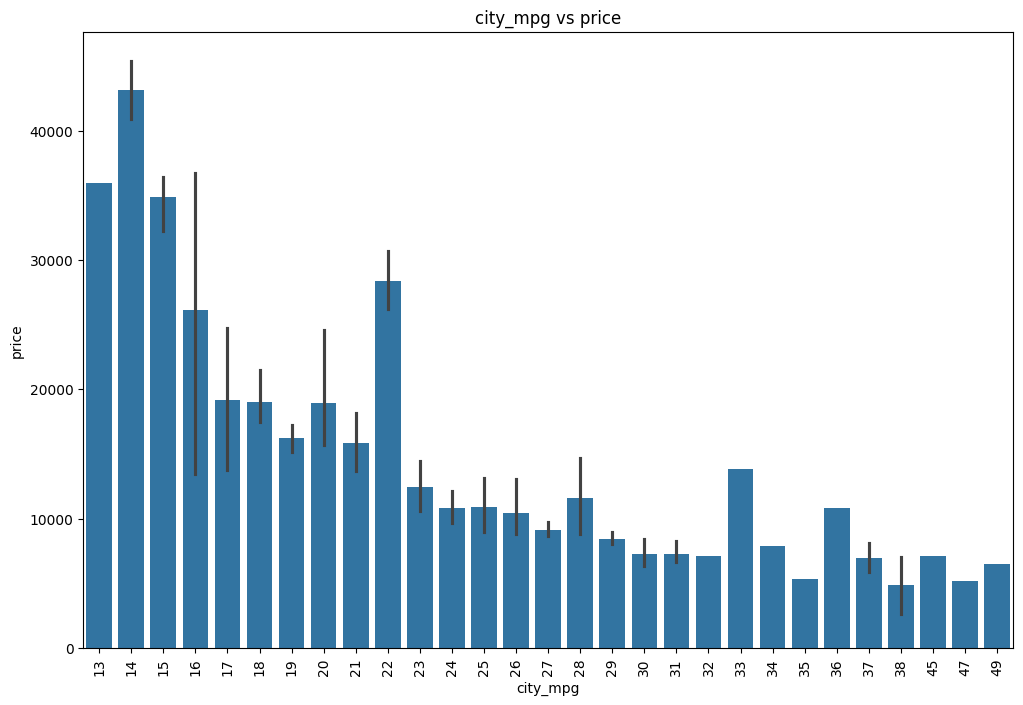

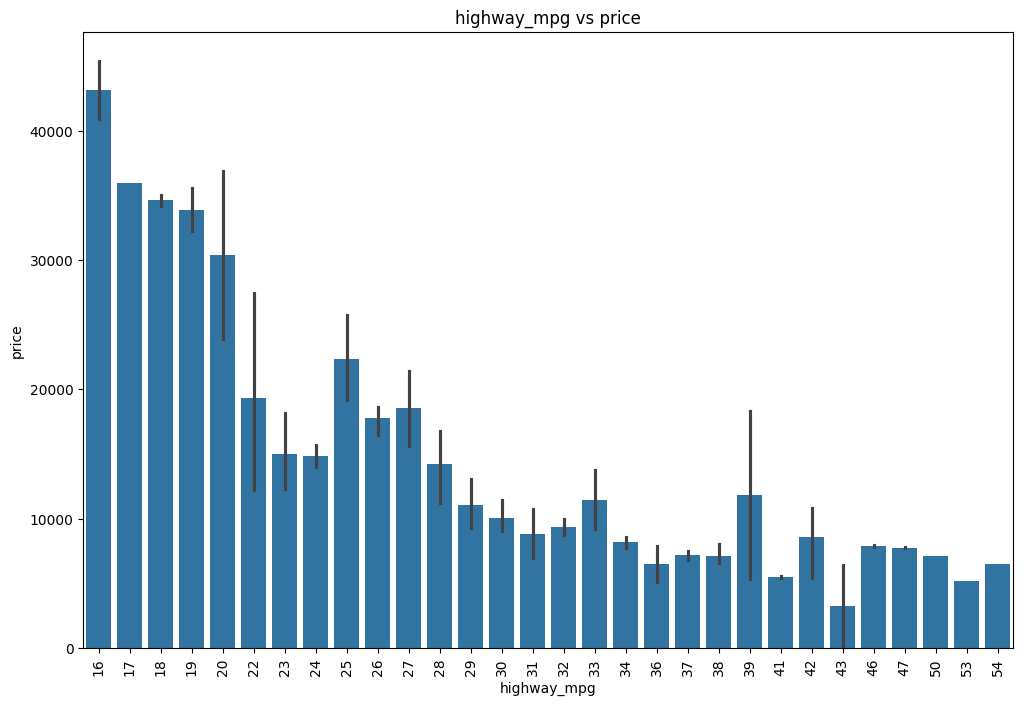

In [9]:
for feature in discrete_features:
  if feature == 'price' or feature == 'curb_weight' :
    pass
  else:
      plt.figure(figsize=(12,8))
      sns.barplot(data=df , x=feature , y='price' , estimator='mean')
      plt.xlabel(feature)
      plt.ylabel('price')
      plt.title(f'{feature} vs price')
      plt.xticks(rotation=90)
      plt.show()



Extracting continious values

In [10]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
df[continuous_features]

,wheel_base,length,width,height,compression_ratio
0,88.6,168.8,64.1,48.8,9.0
1,88.6,168.8,64.1,48.8,9.0
2,94.5,171.2,65.5,52.4,9.0
3,99.8,176.6,66.2,54.3,70.0
4,99.4,176.6,66.4,54.3,8.0
...,...,...,...,...,...
198,109.1,188.8,68.9,55.5,9.5
199,109.1,188.8,68.8,55.5,8.7
200,109.1,188.8,68.9,55.5,8.8
201,109.1,188.8,68.9,55.5,23.0


Apply log transform to continious values making them closer to a normal distribution

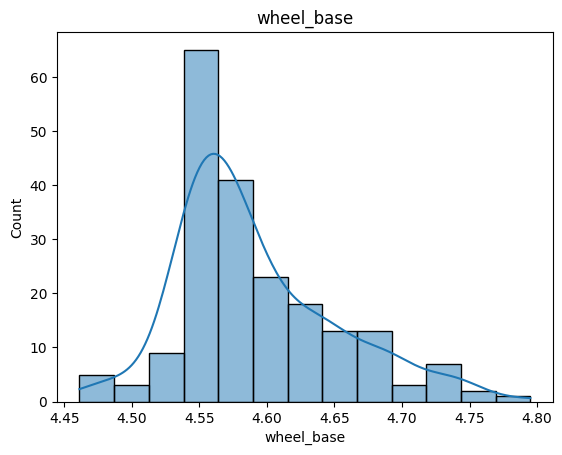

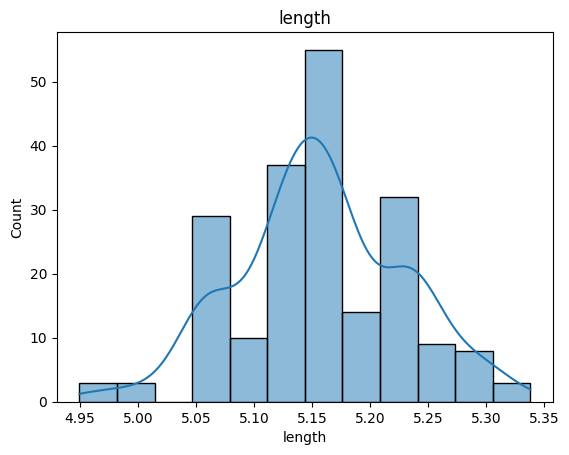

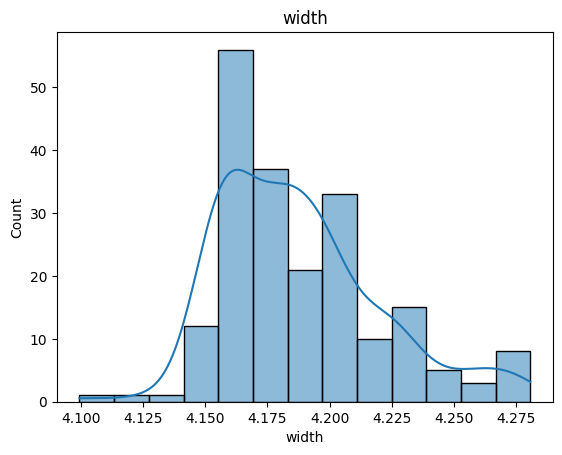

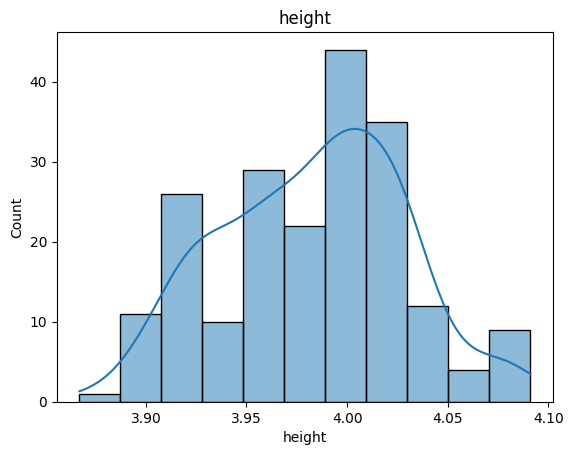

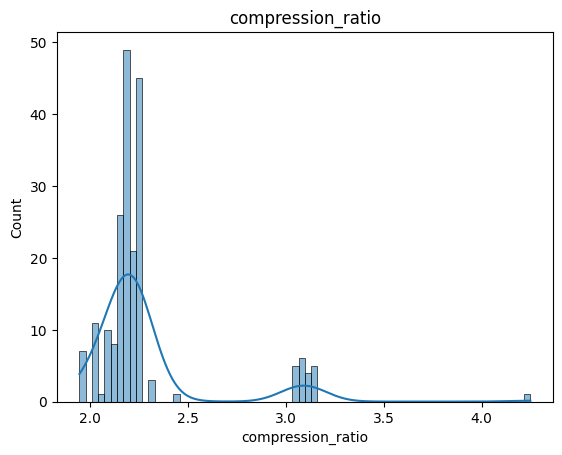

In [11]:
for feature in continuous_features :
  data = df.copy()
  data[feature] = np.log(data[feature])
  sns.histplot(data=data, x=feature, kde=True)
  plt.xlabel(feature)
  plt.title(feature)
  plt.show()




Check for Outliers

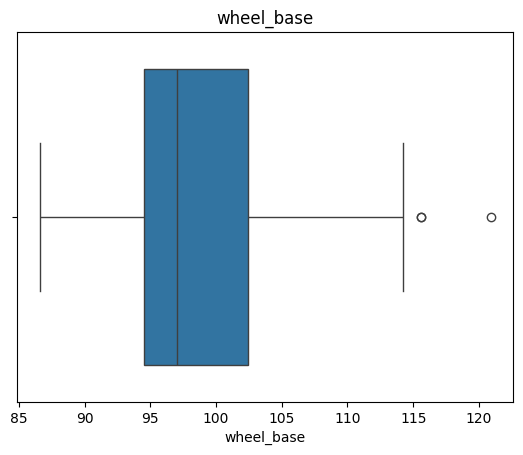

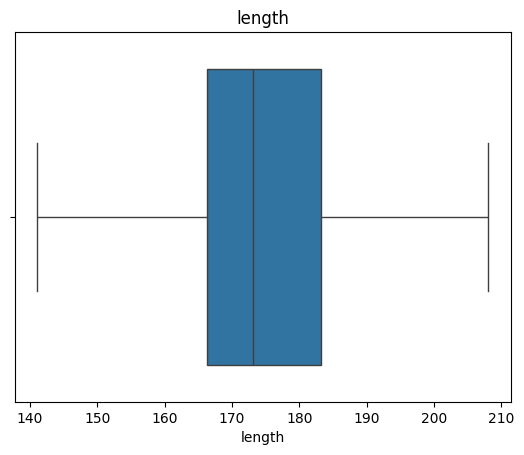

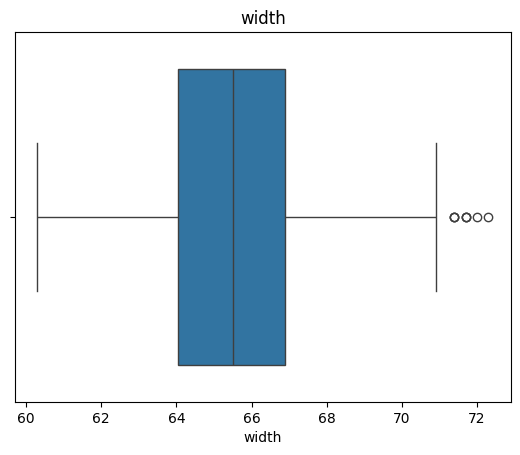

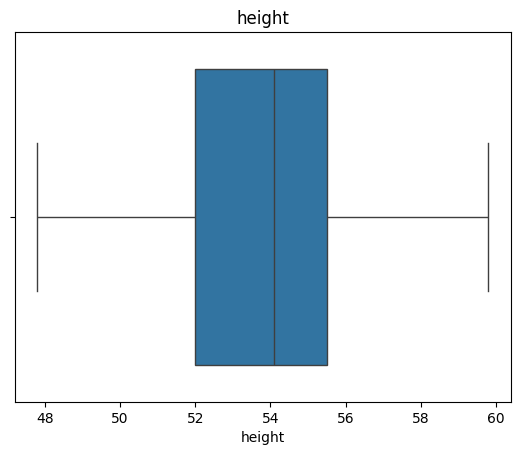

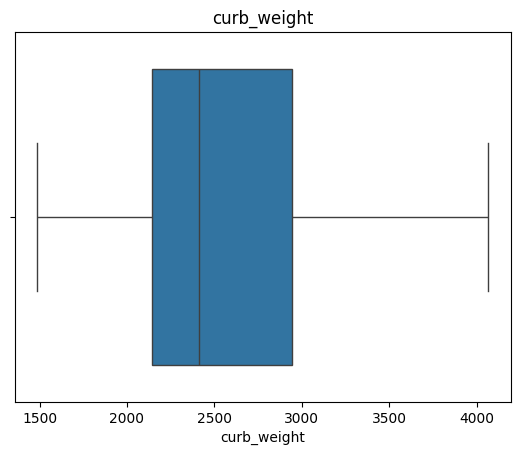

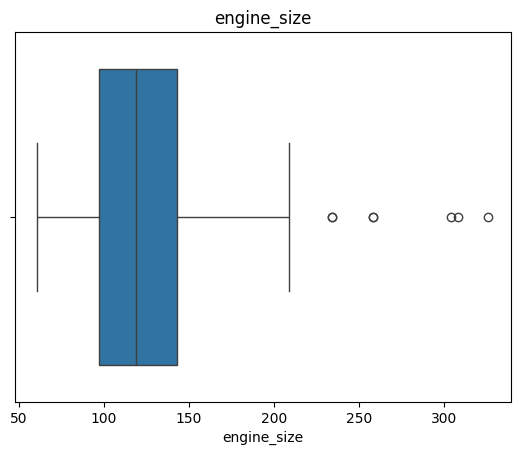

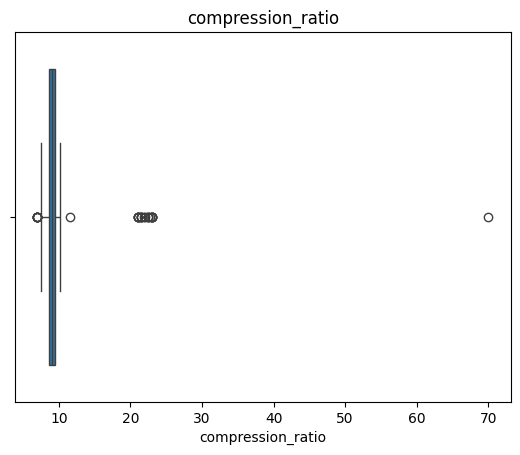

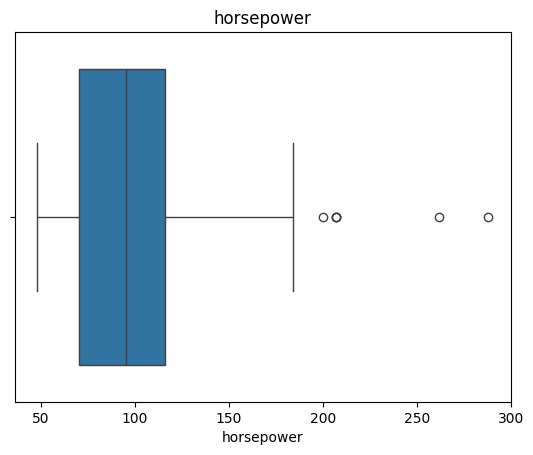

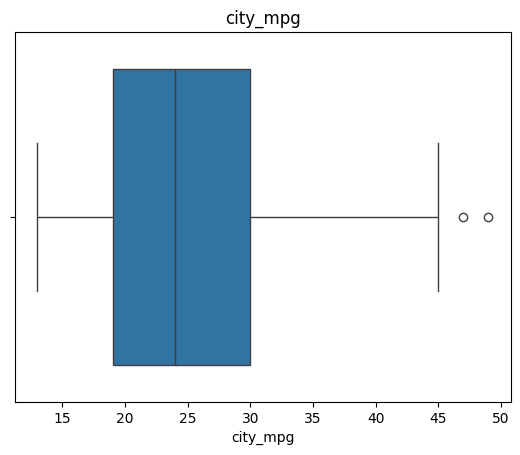

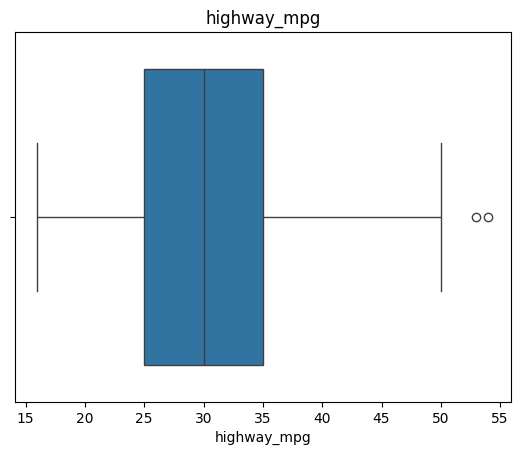

In [12]:
for feature in numerical_features:
  if 0 in df[feature].unique():
    pass
  else:
     sns.boxplot(data=df , x=feature)
     plt.title(feature)
     plt.show()




```
Obervation : the data has outliers
```



Checking if the data is balanced

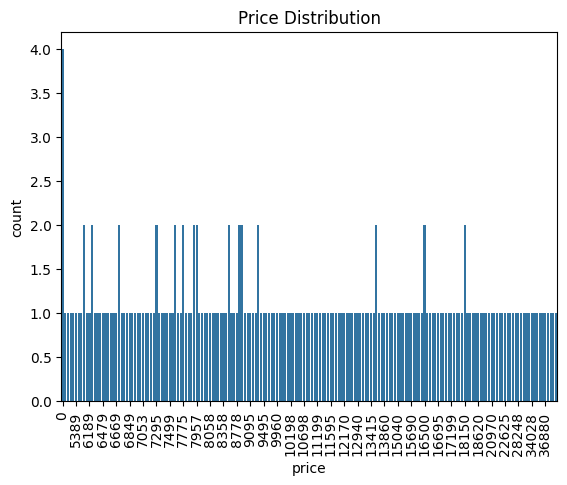

In [13]:
sns.countplot(data=df, x='price')
plt.title('Price Distribution')
plt.xticks(ticks=range(0, len(df['price'].unique()), 5), rotation=90)
plt.show()



```
Observation : the data is balanced
```



Correlation

In [14]:
correlation_matrix = df[numerical_features].corr()
correlation_matrix

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,price
wheel_base,1.000000,0.878139,0.797576,0.591503,0.776901,0.570455,0.179828,0.352297,-0.472620,-0.544452,0.578045
length,0.878139,1.000000,0.841173,0.493761,0.878776,0.683610,0.121069,0.555003,-0.670589,-0.705537,0.688084
width,0.797576,0.841173,1.000000,0.282078,0.867727,0.735454,0.132718,0.642482,-0.642351,-0.677632,0.697788
height,0.591503,0.493761,0.282078,1.000000,0.295807,0.067939,0.191941,-0.110711,-0.050130,-0.107789,0.158270
curb_weight,0.776901,0.878776,0.867727,0.295807,1.000000,0.850816,0.082686,0.751034,-0.758145,-0.797515,0.800289
engine_size,0.570455,0.683610,0.735454,0.067939,0.850816,1.000000,-0.001614,0.810773,-0.653668,-0.677568,0.839384
compression_ratio,0.179828,0.121069,0.132718,0.191941,0.082686,-0.001614,1.000000,-0.144689,0.213352,0.177294,0.058855
horsepower,0.352297,0.555003,0.642482,-0.110711,0.751034,0.810773,-0.144689,1.000000,-0.803620,-0.770908,0.704127
city_mpg,-0.472620,-0.670589,-0.642351,-0.050130,-0.758145,-0.653668,0.213352,-0.803620,1.000000,0.972019,-0.662368
highway_mpg,-0.544452,-0.705537,-0.677632,-0.107789,-0.797515,-0.677568,0.177294,-0.770908,0.972019,1.000000,-0.688123


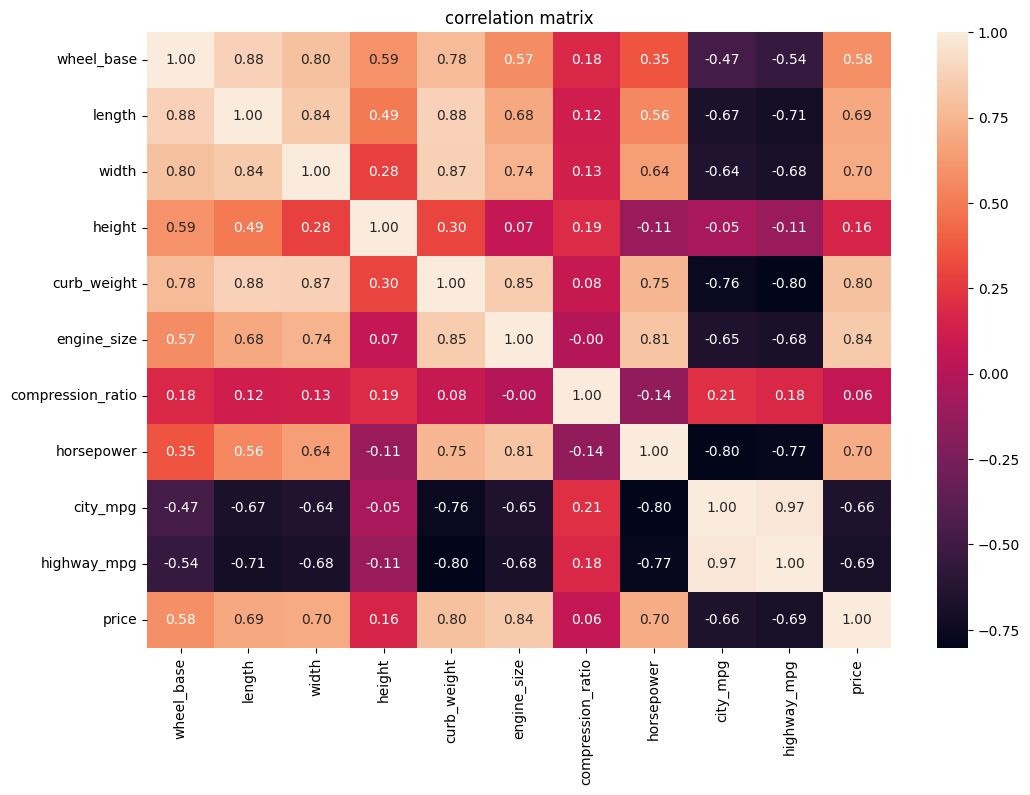

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix ,annot=True, fmt='.2f')
plt.title('correlation matrix')
plt.show()



```
Observation : we have strong correlation with features here , so we dont need to extract new features in feature engineering part
```



**Feature Engineering**

Dealing with missing and improper values

In [16]:
improper_numerical_values = df[df[numerical_features].isnull().any(axis=1) | (df[numerical_features] == 0).any(axis=1)]
improper_numerical_values
df['price'] = df['price'].replace(0,df['price'].median())



```
Since we have outliers , so we will replace these rare 0 values with the median

```



In [17]:
check_categorical_values = [feature for feature in categorical_features if not any(f.isalnum() for f in categorical_features)]
df[check_categorical_values].nunique()
for feature in check_categorical_values:
  print(f"feature : {feature} --- instacnes : {df[feature].unique()}")

feature : Car_name --- instacnes : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
feature : fuel_type --- instacnes : ['gas' 'diesel']
feature : num_of_doors --- instacnes : ['two' 'four' nan]
feature : body_style --- instacnes : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
feature : drive_wheels --- instacnes : ['rwd' 'fwd' '4wd ' '4wd']
feature : engine_location --- instacnes : ['front' 'rear']
feature : engine_type --- instacnes : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
feature : num_of_cylinders --- instacnes : ['four' 'six' 'five' 'three' 'twelve' 'two' 'tow' 'eight']
feature : fuel_system --- instacnes : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [18]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.head()

,Car_name,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


we have only 2 rare Missing values and 1 duplicate value , so we can drop them

Feature Transformation

In [19]:
df[categorical_features].head()
df[categorical_features].nunique()
high_dimension_features = [feature for feature in categorical_features if len(df[feature].unique()) > 5]
high_dimension_features
low_dimension_features = [feature for feature in categorical_features if feature not in high_dimension_features]
low_dimension_features

['fuel_type', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location']



```
we will apply label encoding to high dimension features and one hot encoding to low dimension features
```



In [20]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
for feature in high_dimension_features:
  df[feature] = l_encoder.fit_transform(df[feature])

df = pd.get_dummies(df, columns=low_dimension_features, drop_first=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 202
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_name              200 non-null    int64  
 1   wheel_base            200 non-null    float64
 2   length                200 non-null    float64
 3   width                 200 non-null    float64
 4   height                200 non-null    float64
 5   curb_weight           200 non-null    int64  
 6   engine_type           200 non-null    int64  
 7   num_of_cylinders      200 non-null    int64  
 8   engine_size           200 non-null    int64  
 9   fuel_system           200 non-null    int64  
 10  compression_ratio     200 non-null    float64
 11  horsepower            200 non-null    int64  
 12  city_mpg              200 non-null    int64  
 13  highway_mpg           200 non-null    int64  
 14  price                 200 non-null    int64  
 15  fuel_type_gas         200 no

Feature Transformtaion

In [21]:
from sklearn.preprocessing import StandardScaler
numerical_features_new = [feature for feature in numerical_features if feature != 'price']
normalizer = StandardScaler()
df[numerical_features_new] = normalizer.fit_transform(df[numerical_features_new])
df.head()

,Car_name,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,...,fuel_type_gas,num_of_doors_two,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_rear
0,0,-1.685846,-0.425550,-0.838755,-2.031506,-0.021095,0,2,0.068834,5,...,True,True,False,False,False,False,False,False,True,False
1,0,-1.685846,-0.425550,-0.838755,-2.031506,-0.021095,0,2,0.068834,5,...,True,True,False,False,False,False,False,False,True,False
2,0,-0.712656,-0.231806,-0.190531,-0.554345,0.502714,5,3,0.592826,5,...,True,True,False,True,False,False,False,False,True,False
3,1,0.161566,0.204117,0.133580,0.225267,-0.423000,3,2,-0.431341,5,...,True,False,False,False,True,False,False,True,False,False
4,1,0.095587,0.204117,0.226184,0.225267,0.504619,3,1,0.211741,5,...,True,False,False,False,True,False,True,False,False,False


Handling outliers

In [22]:
for feature in numerical_features_new:
    data = df[feature]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5* IQR
    upper_limit = Q3 + 1.5*IQR
    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])

`The data is balanced, so there is no need to apply resampling techniques`

Feature Selection



```
applying feature selection using lasso
```



In [34]:
X = df.drop('price' , axis=1)
y = df['price']

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=100)
lasso.fit(X,y)
coefficients = lasso.coef_
coefficients
selected_features = X.columns[coefficients != 0]
X_selected = X[selected_features]
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 202
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_name              200 non-null    int64  
 1   wheel_base            200 non-null    float64
 2   width                 200 non-null    float64
 3   height                200 non-null    float64
 4   curb_weight           200 non-null    float64
 5   engine_type           200 non-null    int64  
 6   num_of_cylinders      200 non-null    int64  
 7   engine_size           200 non-null    float64
 8   horsepower            200 non-null    float64
 9   city_mpg              200 non-null    float64
 10  body_style_hatchback  200 non-null    bool   
 11  body_style_wagon      200 non-null    bool   
 12  drive_wheels_rwd      200 non-null    bool   
 13  engine_location_rear  200 non-null    bool   
dtypes: bool(4), float64(7), int64(3)
memory usage: 18.0 KB




```
we have a large alpha value becuase the features are highly correlated
```



**Modeling**

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

models = [('Linear Regression', LinearRegression(), {}),
          ('Random Forest Regressor', RandomForestRegressor(),
           {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}),
          ('Support Vector Machine', SVR(),
           {'kernel': ['linear', 'sigmoid', 'rbf'], 'gamma': ['scale', 'auto'], 'C': [0.1, 1, 10]})
]

best_model = None
best_param = None
best_score = -np.inf

for name, model, model_param in models:
    grid_search = GridSearchCV(model, model_param, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    print(f"model: {name} --> best parameter: {grid_search.best_params_}")
    print(f"model: {name} --> best score: {grid_search.best_score_}")
    print("========================")

    if grid_search.best_score_ > best_score:
        best_model = model
        best_param = grid_search.best_params_
        best_score = grid_search.best_score_

print(f"best model: {best_model}")
print(f"best parameters: {best_param}")
print(f"best score: {best_score}")

model: Linear Regression --> best parameter: {}
model: Linear Regression --> best score: 0.7025688672449653
model: Random Forest Regressor --> best parameter: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
model: Random Forest Regressor --> best score: 0.8121149780081593
model: Support Vector Machine --> best parameter: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
model: Support Vector Machine --> best score: 0.435471295897681
best model: RandomForestRegressor()
best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
best score: 0.8121149780081593


RandomForest has the highest score , so we are going to use it in our project

In [43]:
model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=100)
model.fit(x_train , y_train)
y_predicted = model.predict(x_test)
y_predicted

array([10147.95333333, 13445.27666667,  9018.08      , 17870.12      ,
        7137.32583333,  8521.59      , 10010.1       , 11557.06      ,
       39080.52      , 16528.86      , 14825.61      , 14777.12      ,
        6380.16      , 10482.91666667, 31265.34      , 15596.21      ,
       16364.87      , 10104.39      , 16291.72      ,  9593.11      ,
        7628.28      , 15175.43      , 10147.95333333,  7344.7525    ,
       17802.21      , 14905.68      ,  8098.48      , 13247.16      ,
       34049.57      , 10759.62666667,  8072.45      ,  8506.39      ,
        6620.335     ,  7087.77      ,  7487.131     ,  8391.65      ,
       13279.35      , 10772.54666667, 34049.57      , 16968.13      ])

**Model Evaluation**

Actual vs Predicted values

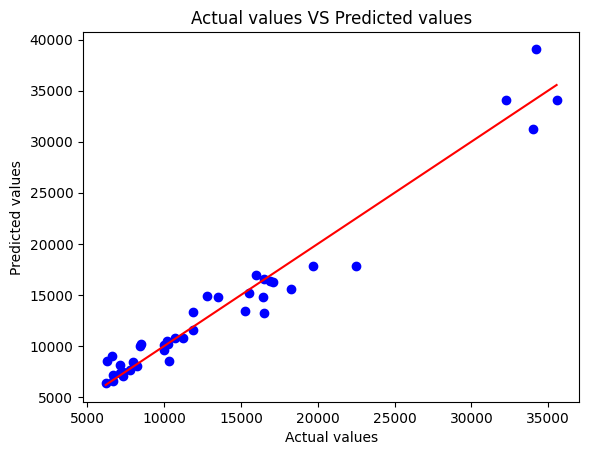

In [44]:
plt.scatter(y_test, y_predicted ,color='blue')
plt.plot([min(y_test),max(y_test)] , [min(y_test) ,max(y_test)] , color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual values VS Predicted values')
plt.show()

Error visualization

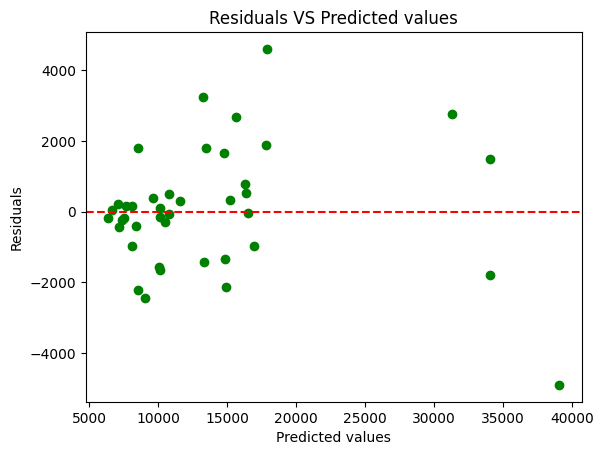

In [45]:
residuals = y_test - y_predicted
plt.scatter(y_predicted , residuals , color='green')
plt.axhline(y=0 , color='red'  ,linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals VS Predicted values')
plt.show()

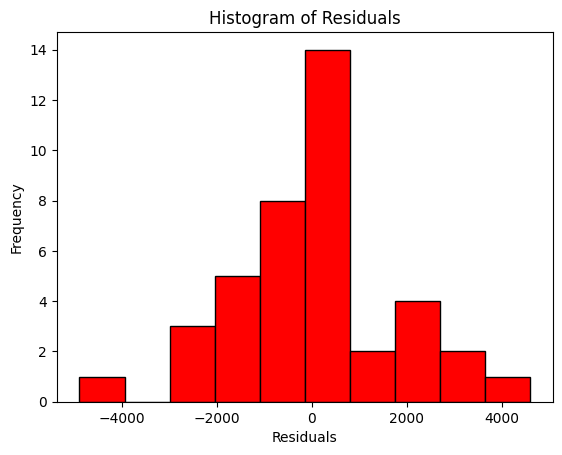

In [46]:
plt.hist(residuals, bins=10, color='red', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Evaluation metrics

In [47]:
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1222.0698583333333
Mean Squared Error (MSE): 2935069.9424752397
Root Mean Squared Error (RMSE): 1713.2045827849165
R-squared (R²): 0.9532562467100938


By applying Random Forest regression, we effectively predicted car prices with high accuracy (0.95)